In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Oil reserves.csv') # Data is in total number of barrels
df.head(10)

,Entity,Code,Year,Oil - Proved reserves
0,Africa,NaN,1980,5.343652e+10
1,Africa,NaN,1981,5.628177e+10
2,Africa,NaN,1982,5.827078e+10
3,Africa,NaN,1983,5.803876e+10
4,Africa,NaN,1984,5.776658e+10
5,Africa,NaN,1985,5.703738e+10
6,Africa,NaN,1986,5.796606e+10
7,Africa,NaN,1987,5.866358e+10
8,Africa,NaN,1988,5.899675e+10
9,Africa,NaN,1989,5.908653e+10


In [7]:
df['Entity'].unique()

array(['Africa', 'Algeria', 'Angola', 'Argentina', 'Asia Pacific',
       'Australia', 'Azerbaijan', 'Brazil', 'Brunei', 'CIS', 'Canada',
       'Chad', 'China', 'Colombia', 'Congo', 'Denmark', 'Ecuador',
       'Egypt', 'Equatorial Guinea', 'Europe', 'European Union', 'Gabon',
       'India', 'Indonesia', 'Iran', 'Iraq', 'Italy', 'Kazakhstan',
       'Kuwait', 'Libya', 'Malaysia', 'Mexico', 'Middle East', 'Nigeria',
       'Non-OECD', 'North America', 'Norway', 'OECD', 'Oman', 'Peru',
       'Qatar', 'Romania', 'Russia', 'Saudi Arabia',
       'South & Central America', 'South Sudan', 'Sudan', 'Syria',
       'Thailand', 'Trinidad and Tobago', 'Tunisia', 'Turkmenistan',
       'United Arab Emirates', 'United Kingdom', 'United States',
       'Uzbekistan', 'Venezuela', 'Vietnam', 'World', 'Yemen'],
      dtype=object)

## Visualising the trend of oil reserves by individual country/region (w User input)

Type in the name of a country/region to see YoY Trend of their oil reserves: 
Indonesia


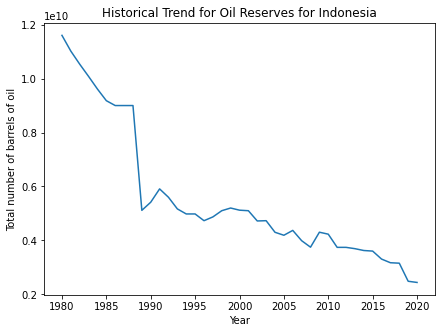

In [31]:
while True:
    
    country_name = input('Type in the name of a country/region to see YoY Trend of their oil reserves: \n')
    
    if country_name not in df['Entity'].unique():
        print('That is not a valid input. Try again.\n')
        country_name
        
    else:
        country = df.loc[df['Entity'] == country_name]
        
        plt.figure(figsize = (7, 5))
        
        plt.plot(country['Year'], country['Oil - Proved reserves'])
        
        plt.title('Historical Trend for Oil Reserves for {0}'.format(country_name))
        plt.xlabel('Year')
        plt.ylabel('Total number of barrels of oil')
        
        plt.show()
        break # Remove break if want to see different trends

## Splitting Data Frame into 2 Data Frames: 1 for regions, and 1 for individual countries

### Sort by region

In [24]:
non_countries = ['Africa', 'Asia Pacific', 'CIS', 'Europe', 'European Union', 'Middle East', 'Non-OECD',
                 'North America', 'OECD', 'South & Central America', 'World']

In [26]:
df_region = df[df['Entity'].isin(non_countries)]
df_region

,Entity,Code,Year,Oil - Proved reserves
0,Africa,NaN,1980,5.343652e+10
1,Africa,NaN,1981,5.628177e+10
2,Africa,NaN,1982,5.827078e+10
3,Africa,NaN,1983,5.803876e+10
4,Africa,NaN,1984,5.776658e+10
...,...,...,...,...
2327,World,OWID_WRL,2016,1.690281e+12
2328,World,OWID_WRL,2017,1.728171e+12
2329,World,OWID_WRL,2018,1.736144e+12
2330,World,OWID_WRL,2019,1.734811e+12


### Sort by country

In [27]:
df_country = df[~df['Entity'].isin(non_countries)]
df_country

,Entity,Code,Year,Oil - Proved reserves
41,Algeria,DZA,1980,8.200000e+09
42,Algeria,DZA,1981,8.080000e+09
43,Algeria,DZA,1982,9.440000e+09
44,Algeria,DZA,1983,9.220000e+09
45,Algeria,DZA,1984,9.000000e+09
...,...,...,...,...
2368,Yemen,YEM,2016,3.000000e+09
2369,Yemen,YEM,2017,3.000000e+09
2370,Yemen,YEM,2018,3.000000e+09
2371,Yemen,YEM,2019,3.000000e+09


## Top 10 Individual Countries with highest mean oil reserves

In [56]:
allcor = df_country.groupby(['Entity'])['Oil - Proved reserves'].mean()
top10cor = allcor.nlargest(10)
tor = top10cor.sort_values(ascending = False)
tor

Entity
Saudi Arabia            2.479976e+11
Venezuela               1.325016e+11
Canada                  1.139964e+11
Iran                    1.134196e+11
Iraq                    1.083958e+11
Russia                  9.615301e+10
Kuwait                  9.549283e+10
United Arab Emirates    8.824093e+10
United States           3.776863e+10
Libya                   3.454507e+10
Name: Oil - Proved reserves, dtype: float64

## Bar plot for gas consumption for the Top 10 Individual Countries with highest Mean Oil Reserves

In [95]:
tordf = pd.DataFrame(tor)
tordf

,Oil - Proved reserves
Entity,
Saudi Arabia,2.479976e+11
Venezuela,1.325016e+11
Canada,1.139964e+11
Iran,1.134196e+11
Iraq,1.083958e+11
Russia,9.615301e+10
Kuwait,9.549283e+10
United Arab Emirates,8.824093e+10
United States,3.776863e+10


In [96]:
tordf['Oil - Proved reserves']

Entity
Saudi Arabia            2.479976e+11
Venezuela               1.325016e+11
Canada                  1.139964e+11
Iran                    1.134196e+11
Iraq                    1.083958e+11
Russia                  9.615301e+10
Kuwait                  9.549283e+10
United Arab Emirates    8.824093e+10
United States           3.776863e+10
Libya                   3.454507e+10
Name: Oil - Proved reserves, dtype: float64

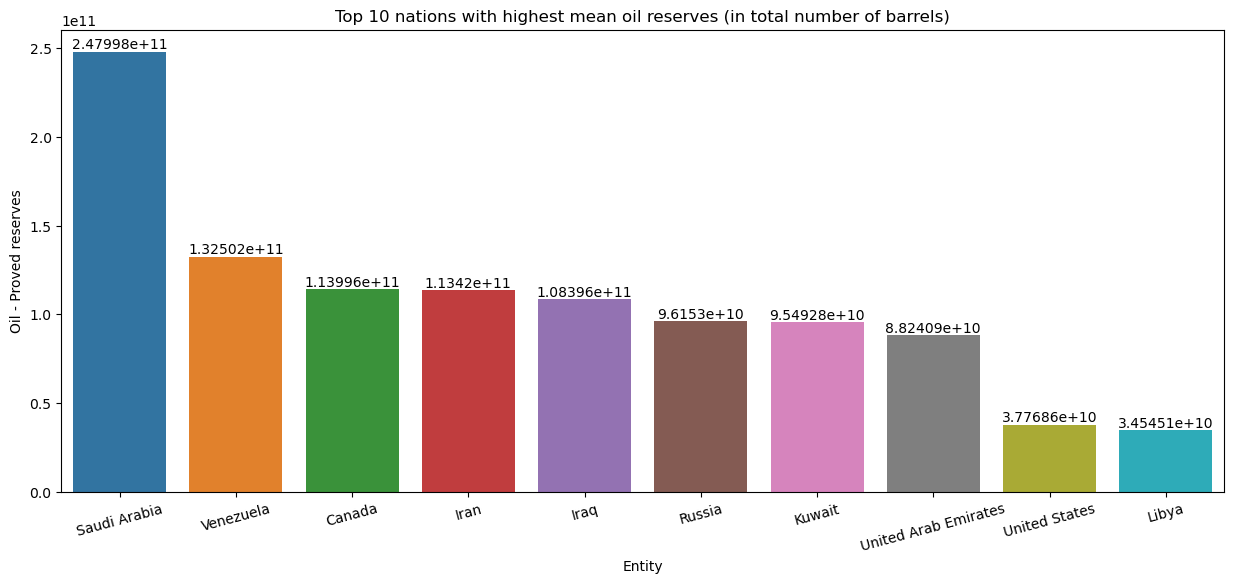

In [97]:
plt.figure(figsize = (15, 6))
plt.style.use('default')

ax = sns.barplot(x = tordf.index, y = 'Oil - Proved reserves', data = tordf)
ax.bar_label(ax.containers[0])

plt.title('Top 10 nations with highest mean oil reserves (in total number of barrels)')
plt.xticks(rotation = 15)

plt.show()

## Historical Trend of oil reserves in top 10 countries (as of 2020) with highest oil reserves

In [98]:
tor2020 = df_country.loc[df_country['Year'] == 2020]
tor10 = tor2020.nlargest(10, 'Oil - Proved reserves')
tor10

,Entity,Code,Year,Oil - Proved reserves
2249,Venezuela,VEN,2020,3.038057e+11
1770,Saudi Arabia,SAU,2020,2.975270e+11
439,Canada,CAN,2020,1.680876e+11
1002,Iran,IRN,2020,1.578000e+11
1043,Iraq,IRQ,2020,1.450190e+11
1729,Russia,RUS,2020,1.078042e+11
1155,Kuwait,KWT,2020,1.015000e+11
2096,United Arab Emirates,ARE,2020,9.780000e+10
2178,United States,USA,2020,6.875700e+10
1196,Libya,LBY,2020,4.836300e+10


In [99]:
df_tor10 = df_country[df_country['Entity'].isin(tor10['Entity'].values)]
df_tor10

,Entity,Code,Year,Oil - Proved reserves
399,Canada,CAN,1980,3.952752e+10
400,Canada,CAN,1981,4.017534e+10
401,Canada,CAN,1982,4.031210e+10
402,Canada,CAN,1983,4.049126e+10
403,Canada,CAN,1984,4.053177e+10
...,...,...,...,...
2245,Venezuela,VEN,2016,3.022504e+11
2246,Venezuela,VEN,2017,3.028080e+11
2247,Venezuela,VEN,2018,3.038057e+11
2248,Venezuela,VEN,2019,3.038057e+11


### Rearranging list for ordered plt.legend()

In [100]:
entity_sort = list(tor10.sort_values('Entity')['Entity'].values)
entity_sort

['Canada',
 'Iran',
 'Iraq',
 'Kuwait',
 'Libya',
 'Russia',
 'Saudi Arabia',
 'United Arab Emirates',
 'United States',
 'Venezuela']

In [101]:
new_sort = list(tor10['Entity'])
new_sort 

['Venezuela',
 'Saudi Arabia',
 'Canada',
 'Iran',
 'Iraq',
 'Russia',
 'Kuwait',
 'United Arab Emirates',
 'United States',
 'Libya']

In [102]:
ord_list = []

for item in new_sort:
    if item in entity_sort:
        ord_list.append(entity_sort.index(item))
    
ord_list

[9, 6, 0, 1, 2, 5, 3, 7, 8, 4]

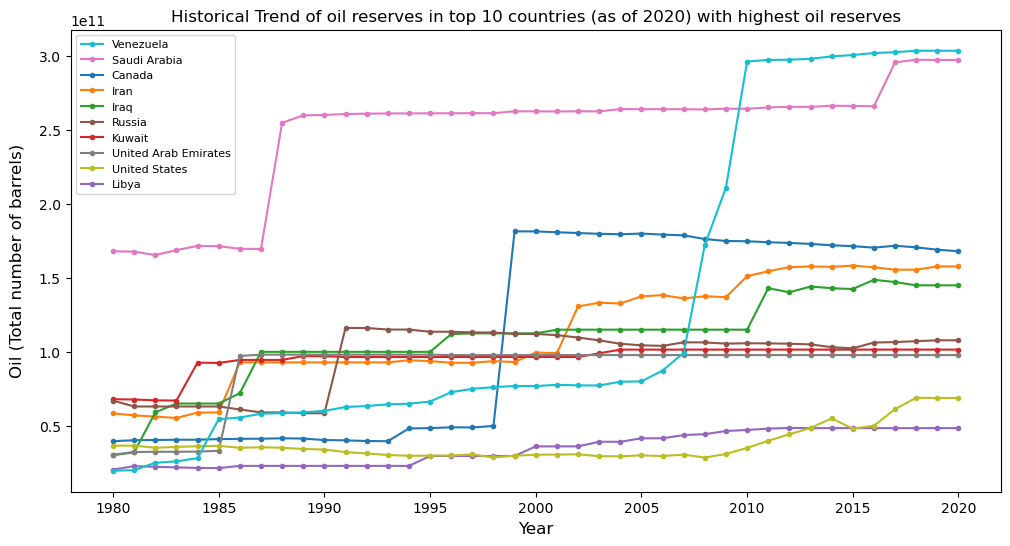

In [104]:
fig, ax = plt.subplots(figsize = (12, 6))

for opc, group in df_tor10.groupby('Entity'):
    group.plot(x = 'Year', y = 'Oil - Proved reserves', ax = ax, label = opc, marker = '.')

plt.xlabel('Year', fontsize = 12)
plt.ylabel('Oil (Total number of barrels)', labelpad = 10, fontsize = 12)
plt.title('Historical Trend of oil reserves in top 10 countries (as of 2020) with highest oil reserves')

handles, labels = plt.gca().get_legend_handles_labels()
order = ord_list
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc = 'upper left', fontsize = 8)

plt.show()

## Historical Trend of oil reserves in different regions of the world

In [105]:
df_region

,Entity,Code,Year,Oil - Proved reserves
0,Africa,NaN,1980,5.343652e+10
1,Africa,NaN,1981,5.628177e+10
2,Africa,NaN,1982,5.827078e+10
3,Africa,NaN,1983,5.803876e+10
4,Africa,NaN,1984,5.776658e+10
...,...,...,...,...
2327,World,OWID_WRL,2016,1.690281e+12
2328,World,OWID_WRL,2017,1.728171e+12
2329,World,OWID_WRL,2018,1.736144e+12
2330,World,OWID_WRL,2019,1.734811e+12


### Rearranging list for ordered plt.legend()

In [117]:
x = df_region.loc[df_region['Year'] == 2020].sort_values('Oil - Proved reserves', ascending = False).reset_index()
x

,index,Entity,Code,Year,Oil - Proved reserves
0,2331,World,OWID_WRL,2020,1.732366e+12
1,1401,Non-OECD,NaN,2020,1.472403e+12
2,1319,Middle East,NaN,2020,8.359417e+11
3,1811,South & Central America,NaN,2020,3.233661e+11
4,1524,OECD,NaN,2020,2.599627e+11
5,1442,North America,NaN,2020,2.429105e+11
6,398,CIS,NaN,2020,1.462482e+11
7,40,Africa,NaN,2020,1.251120e+11
8,204,Asia Pacific,NaN,2020,4.515872e+10
9,797,Europe,NaN,2020,1.362896e+10


In [123]:
entity_sort = list(df_region['Entity'].unique())
entity_sort 

['Africa',
 'Asia Pacific',
 'CIS',
 'Europe',
 'European Union',
 'Middle East',
 'Non-OECD',
 'North America',
 'OECD',
 'South & Central America',
 'World']

In [124]:
new_sort = list(x['Entity'])
new_sort

['World',
 'Non-OECD',
 'Middle East',
 'South & Central America',
 'OECD',
 'North America',
 'CIS',
 'Africa',
 'Asia Pacific',
 'Europe',
 'European Union']

In [125]:
ord_list = []

for item in new_sort:
    if item in entity_sort:
        ord_list.append(entity_sort.index(item))
    
ord_list

[10, 6, 5, 9, 8, 7, 2, 0, 1, 3, 4]

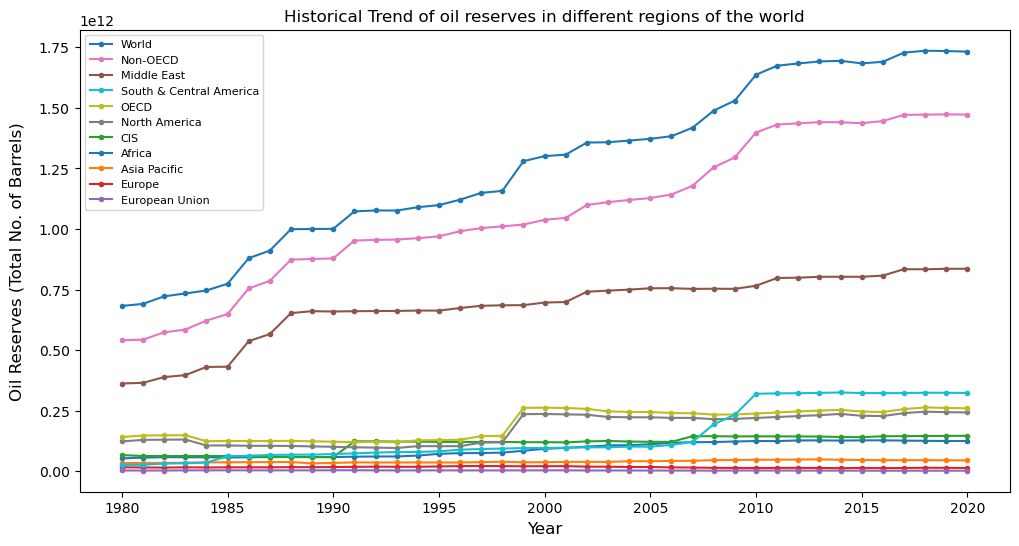

In [128]:
fig, ax = plt.subplots(figsize = (12, 6))

for opr, group in df_region.groupby('Entity'):
    group.plot(x = 'Year', y = 'Oil - Proved reserves', ax = ax, label = opr, marker = '.')

plt.xlabel('Year', fontsize = 12)
plt.ylabel('Oil Reserves (Total No. of Barrels)', labelpad = 10, fontsize = 12)
plt.title('Historical Trend of oil reserves in different regions of the world')

handles, labels = plt.gca().get_legend_handles_labels()
order = ord_list
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc = 'upper left', fontsize = 8)

plt.show()